In [1]:
import pandas as pd
data=pd.read_csv("pos_neg.csv")

In [4]:
data["length"]=data["review"].apply(len)

In [5]:
data.head()

,review,sentiment,length
0,"b""I went and saw this movie last night after b...",pos,797
1,b'Actor turned director Bill Paxton follows up...,pos,2012
2,b'As a recreational golfer with some knowledge...,pos,1442
3,"b""I saw this film in a sneak preview, and it i...",pos,685
4,b'Bill Paxton has taken the true story of the ...,pos,1219


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000174AAC7D408>,
      dtype=object)

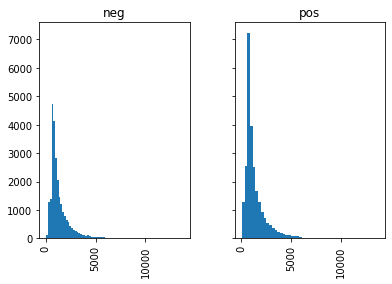

In [10]:
import matplotlib.pyplot as plt
data.hist(column='length',bins=50,by='sentiment', sharex=True, sharey=True)


In [3]:
import nltk

In [23]:
from nltk.corpus import stopwords
import string
stop_words=stopwords.words("english")
def txt_clean(text):
    no_punc=[s for s in text if s not in string.punctuation]
    no_punc="".join(no_punc)
    remove_stopwords=[w for w in no_punc.split() if w.lower() not in stop_words]
    return " ".join(remove_stopwords)
    

In [24]:
txt_clean("hi @i #am happy&")

'hi happy'

In [25]:
data.review=data.review.apply(txt_clean)

In [26]:
data.head()

,review,sentiment,length
0,bI went saw movie last night coaxed friends mi...,pos,797
1,bActor turned director Bill Paxton follows pro...,pos,2012
2,bAs recreational golfer knowledge sports histo...,pos,1442
3,bI saw film sneak preview delightful cinematog...,pos,685
4,bBill Paxton taken true story 1913 US golf ope...,pos,1219


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
bog=CountVectorizer()
bog.fit(data["review"])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [29]:
bog.vocabulary_

{'bi': 20798,
 'went': 180546,
 'saw': 144117,
 'movie': 110991,
 'last': 95588,
 'night': 115216,
 'coaxed': 37502,
 'friends': 67767,
 'mine': 107908,
 'ill': 84043,
 'admit': 5802,
 'reluctant': 137733,
 'see': 146440,
 'knew': 93492,
 'ashton': 12522,
 'kutcher': 94500,
 'able': 4159,
 'comedy': 38427,
 'wrong': 184006,
 'played': 127626,
 'character': 33859,
 'jake': 88962,
 'fischer': 64734,
 'well': 180110,
 'kevin': 92301,
 'costner': 41559,
 'ben': 19212,
 'randall': 135044,
 'professionalism': 131661,
 'sign': 150810,
 'good': 72467,
 'toy': 169165,
 'emotions': 56544,
 'one': 119509,
 'exactly': 59341,
 'entire': 57619,
 'theater': 165267,
 'sold': 153975,
 'overcome': 121635,
 'laughter': 95916,
 'first': 64662,
 'half': 75832,
 'moved': 110956,
 'tears': 163888,
 'second': 146226,
 'exiting': 59922,
 'many': 103114,
 'women': 182855,
 'full': 68265,
 'grown': 74464,
 'men': 106123,
 'trying': 170893,
 'desperately': 48072,
 'let': 97215,
 'anyone': 10736,
 'crying': 43699,

In [30]:
len(bog.vocabulary_)

186926

In [31]:
txt_transform=bog.transform(data.review)

In [32]:
txt_transform.shape

(50000, 186926)

In [33]:
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()
mb.fit(txt_transform,data["sentiment"])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
data

,review,sentiment,length
0,bI went saw movie last night coaxed friends mi...,pos,797
1,bActor turned director Bill Paxton follows pro...,pos,2012
2,bAs recreational golfer knowledge sports histo...,pos,1442
3,bI saw film sneak preview delightful cinematog...,pos,685
4,bBill Paxton taken true story 1913 US golf ope...,pos,1219
...,...,...,...
49995,bTowards end movie felt technical felt like cl...,neg,1570
49996,bThis kind movie enemies content watch time bl...,neg,867
49997,bI saw Descent last night Stockholm Film Festi...,neg,1691
49998,bSome films pick pound turn rather good 23rd C...,neg,1280


In [46]:
newsms=data.iloc[4][0]

In [47]:
newsms

'bBill Paxton taken true story 1913 US golf open made film much extraordinary game golf film also deals directly class tensions early twentieth century touches upon profound antiCatholic prejudices British American establishments heart film perennial favourite triumph oddsbr br acting exemplary throughout Stephen Dillane excellent usual revelation movie Shia LaBoeuf delivers disciplined dignified highly sympathetic performance working class FrancoIrish kid fighting way prejudices New England WASP establishment familiar slapstick performances Even Stevens demonstration maturity delightful surprise Josh Flitter ten year old caddy threatens steal every scene appearsbr br old fashioned movie best sense word fine acting clear directing great story grips end final scene affectionate nod Casablanca one many pleasures fill great movie'

In [58]:
def feedback(sms):
    txt=bog.transform([sms])
    print(mb.predict_proba(txt))
    print(mb.predict(txt))

In [64]:
i=int(input("enter the array index"))

feedback(data.iloc[i][0])

enter the array index450
[[0.75597175 0.24402825]]
['neg']
